first i took supermarket store type and then make it in csv file

In [360]:
import pandas as pd

data = pd.read_csv(r"C:\Users\aymna\OneDrive - UMM AL-QURA UNIVERSITY\السنة الثالثة الترم الأول\تحليل البيانات 2\data\Supermarket_Store_Type_Rows.csv")

In [349]:
data.head()

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type
0,1000000005,10/7/2021 12:37,Joshua Frazier,"['Toothpaste', 'Chicken']",3,72.24,Cash,Houston,Supermarket
1,1000000032,4/4/2023 10:57,Robert Gilbert DDS,"['Apple', 'Butter']",7,41.40,Debit Card,Chicago,Supermarket
2,1000000034,2/7/2023 14:09,Stacy Owen,"['Yogurt', 'Ice Cream', 'Insect Repellent']",5,34.27,Credit Card,San Francisco,Supermarket
3,1000000039,7/11/2023 11:36,Donald Bradford,"['Potatoes', 'Air Freshener', 'Sponges', 'Onio...",5,39.08,Cash,Dallas,Supermarket
4,1000000050,4/10/2021 19:14,Ryan Hammond,"['Hand Sanitizer', 'Plant Fertilizer', 'Baby W...",1,78.46,Mobile Payment,San Francisco,Supermarket


In [352]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [354]:
data['City'].value_counts()

City
Dallas           16906
New York         16869
Seattle          16772
Boston           16765
Chicago          16747
San Francisco    16616
Los Angeles      16616
Miami            16581
Houston          16565
Atlanta          16499
Name: count, dtype: int64

In [356]:
data['Store_Type'].value_counts()

Store_Type
Supermarket    166936
Name: count, dtype: int64

In [364]:
# Filter the dataset for transactions in New York
my_data = data[data['City'] == 'New York']

my_data['Product'] = my_data['Product'].str.replace(r"[\[\]']", '', regex=True).str.split(',')

transaction_data = my_data.explode('Product')

transaction_data['Product'] = transaction_data['Product'].str.strip()

In [407]:
my_data

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type
20,1000000160,2/28/2024 14:41,Michael Perez,"[Water, Mop]",9,71.79,Mobile Payment,New York,Supermarket
22,1000000182,11/18/2020 8:26,John Burton,"[Vinegar, Soap]",2,74.81,Credit Card,New York,Supermarket
36,1000000264,9/8/2021 12:36,Sean Obrien,"[Garden Hose, Milk, Lawn Mower]",7,19.95,Mobile Payment,New York,Supermarket
74,1000000489,12/11/2023 23:23,Michelle Moreno,"[Shaving Cream, Air Freshener, Mop, Butter,...",3,7.78,Mobile Payment,New York,Supermarket
79,1000000506,5/17/2024 15:59,Bryan Sanford,"[Hand Sanitizer, Eggs, Beef, Shower Gel, C...",1,56.03,Mobile Payment,New York,Supermarket
...,...,...,...,...,...,...,...,...,...
166903,1000999823,1/1/2023 9:03,Kyle Hoffman,"[Pickles, Tea, Potatoes, Cleaning Spray]",3,8.92,Credit Card,New York,Supermarket
166905,1000999834,2/11/2023 7:39,Ernest Brooks,[Air Freshener],8,25.36,Debit Card,New York,Supermarket
166915,1000999876,8/11/2020 7:32,Kyle Jones,[Bread],5,97.06,Debit Card,New York,Supermarket
166919,1000999895,7/30/2020 22:51,Megan Morgan,[Honey],9,99.25,Credit Card,New York,Supermarket


In [414]:
transaction_data


In [ ]:
v =transaction_data['Product'].value_counts()


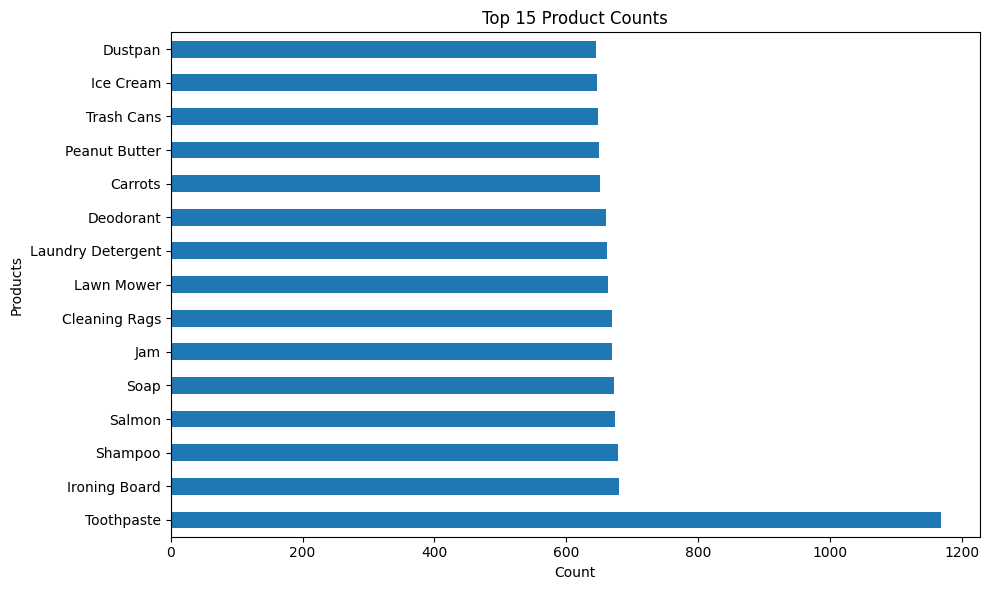

In [426]:
import matplotlib.pyplot as plt


v = transaction_data['Product'].value_counts().head(15)


plt.figure(figsize=(10, 6))
v.plot(kind='barh')
plt.title('Top 15 Product Counts')
plt.xlabel('Count')
plt.ylabel('Products')
plt.tight_layout()
plt.show()


In [366]:
transaction_encoded = transaction_data.pivot_table(index='Transaction_ID', columns='Product', aggfunc='size', fill_value=0)
transaction_encoded

Product,Air Freshener,Apple,BBQ Sauce,Baby Wipes,Banana,Bath Towels,Beef,Bread,Broom,Butter,...,Tomatoes,Toothbrush,Toothpaste,Trash Bags,Trash Cans,Tuna,Vacuum Cleaner,Vinegar,Water,Yogurt
Transaction_ID,,,,,,,,,,,,,,,,,,,,,
1000000160,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1000000182,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000000264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000000489,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1000000506,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000999823,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000999834,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000999876,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [368]:



def binary_encode(x):
    if x >= 1:
        return 1
    else:
        return 0


transaction_encoded = transaction_encoded.applymap(binary_encode)

transaction_encoded



Product,Air Freshener,Apple,BBQ Sauce,Baby Wipes,Banana,Bath Towels,Beef,Bread,Broom,Butter,...,Tomatoes,Toothbrush,Toothpaste,Trash Bags,Trash Cans,Tuna,Vacuum Cleaner,Vinegar,Water,Yogurt
Transaction_ID,,,,,,,,,,,,,,,,,,,,,
1000000160,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1000000182,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000000264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000000489,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1000000506,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000999823,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000999834,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000999876,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [428]:
# apply the Apriori algorithm with a specified min_support
frequent_itemsets = apriori(transaction_encoded, min_support=0.001, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Air Freshener),(BBQ Sauce),0.034916,0.036695,0.001304,0.037351,1.017902,0.000023,1.000682,0.018224
1,(BBQ Sauce),(Air Freshener),0.036695,0.034916,0.001304,0.035541,1.017902,0.000023,1.000648,0.018257
2,(Air Freshener),(Baby Wipes),0.034916,0.035568,0.001423,0.040747,1.145603,0.000181,1.005399,0.131695
3,(Baby Wipes),(Air Freshener),0.035568,0.034916,0.001423,0.040000,1.145603,0.000181,1.005296,0.131784
4,(Air Freshener),(Broom),0.034916,0.034560,0.001719,0.049236,1.424635,0.000512,1.015436,0.308849
5,(Broom),(Air Freshener),0.034560,0.034916,0.001719,0.049743,1.424635,0.000512,1.015603,0.308736
6,(Air Freshener),(Canned Soup),0.034916,0.034560,0.001304,0.037351,1.080757,0.000097,1.002899,0.077426
7,(Canned Soup),(Air Freshener),0.034560,0.034916,0.001304,0.037736,1.080757,0.000097,1.002930,0.077398
8,(Air Freshener),(Carrots),0.034916,0.038058,0.001423,0.040747,1.070657,0.000094,1.002803,0.068381
9,(Carrots),(Air Freshener),0.038058,0.034916,0.001423,0.037383,1.070657,0.000094,1.002563,0.068605


In [430]:
rules.head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Air Freshener),(BBQ Sauce),0.034916,0.036695,0.001304,0.037351,1.017902,0.000023,1.000682,0.018224
1,(BBQ Sauce),(Air Freshener),0.036695,0.034916,0.001304,0.035541,1.017902,0.000023,1.000648,0.018257
2,(Air Freshener),(Baby Wipes),0.034916,0.035568,0.001423,0.040747,1.145603,0.000181,1.005399,0.131695
3,(Baby Wipes),(Air Freshener),0.035568,0.034916,0.001423,0.040000,1.145603,0.000181,1.005296,0.131784
4,(Air Freshener),(Broom),0.034916,0.034560,0.001719,0.049236,1.424635,0.000512,1.015436,0.308849
5,(Broom),(Air Freshener),0.034560,0.034916,0.001719,0.049743,1.424635,0.000512,1.015603,0.308736
6,(Air Freshener),(Canned Soup),0.034916,0.034560,0.001304,0.037351,1.080757,0.000097,1.002899,0.077426
7,(Canned Soup),(Air Freshener),0.034560,0.034916,0.001304,0.037736,1.080757,0.000097,1.002930,0.077398
8,(Air Freshener),(Carrots),0.034916,0.038058,0.001423,0.040747,1.070657,0.000094,1.002803,0.068381
9,(Carrots),(Air Freshener),0.038058,0.034916,0.001423,0.037383,1.070657,0.000094,1.002563,0.068605


show result with some conditions

In [434]:
top_10_lift = rules.sort_values(by='lift', ascending=False).head(30)


top_10_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
216,(Banana),(Tea),0.036220,0.034264,0.002075,0.057283,1.671815,0.000834,1.024418,0.416950
217,(Tea),(Banana),0.034264,0.036220,0.002075,0.060554,1.671815,0.000834,1.025902,0.416105
421,(Canned Soup),(Insect Repellent),0.034560,0.036398,0.001956,0.056604,1.555129,0.000698,1.021418,0.369745
420,(Insect Repellent),(Canned Soup),0.036398,0.034560,0.001956,0.053746,1.555129,0.000698,1.020275,0.370450
737,(Tomatoes),(Cleaning Spray),0.034442,0.034383,0.001838,0.053356,1.551840,0.000653,1.020043,0.368288
736,(Cleaning Spray),(Tomatoes),0.034383,0.034442,0.001838,0.053448,1.551840,0.000653,1.020080,0.368266
1148,(Yogurt),(Ice Cream),0.035568,0.037643,0.002075,0.058333,1.549646,0.000736,1.021972,0.367772
1149,(Ice Cream),(Yogurt),0.037643,0.035568,0.002075,0.055118,1.549646,0.000736,1.020690,0.368565
397,(Butter),(Razors),0.035983,0.035272,0.001956,0.054366,1.541337,0.000687,1.020192,0.364322
396,(Razors),(Butter),0.035272,0.035983,0.001956,0.055462,1.541337,0.000687,1.020623,0.364053


In [401]:
top_10_support_lift = rules.sort_values(by=['support', 'lift'], ascending=[False, False]).head(40)

top_10_support_lift


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1452,(Toothpaste),(Onions),0.066928,0.035983,0.003142,0.046944,1.304616,0.000734,1.011501,0.250239
1453,(Onions),(Toothpaste),0.035983,0.066928,0.003142,0.087315,1.304616,0.000734,1.022338,0.242206
670,(Toothpaste),(Chips),0.066928,0.035983,0.003083,0.046058,1.280000,0.000674,1.010562,0.234441
671,(Chips),(Toothpaste),0.035983,0.066928,0.003083,0.085667,1.280000,0.000674,1.020496,0.226915
1760,(Toothpaste),(Tissues),0.066928,0.037584,0.003083,0.046058,1.225489,0.000567,1.008884,0.197197
1761,(Tissues),(Toothpaste),0.037584,0.066928,0.003083,0.082019,1.225489,0.000567,1.016440,0.191185
1614,(Toothpaste),(Power Strips),0.066928,0.035865,0.002964,0.044287,1.234838,0.000564,1.008813,0.203818
1615,(Power Strips),(Toothpaste),0.035865,0.066928,0.002964,0.082645,1.234838,0.000564,1.017133,0.197252
822,(Toothpaste),(Deodorant),0.066928,0.038532,0.002964,0.044287,1.149349,0.000385,1.006021,0.139263
823,(Deodorant),(Toothpaste),0.038532,0.066928,0.002964,0.076923,1.149349,0.000385,1.010829,0.135150
